In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.metrics import accuracy_score

In [2]:
mat = loadmat('..\datasets\ex3data1.mat')
X = mat['X']
y = mat['y']

In [3]:
print(X.shape, y.shape)

(5000, 400) (5000, 1)


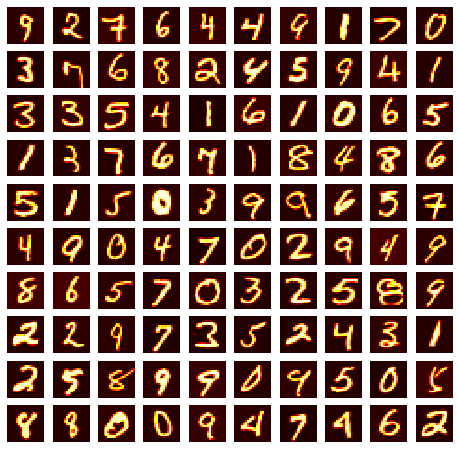

In [4]:
fig, axis = plt.subplots(10, 10, figsize=(8, 8))
for i in range(10):
    for j in range(10):
        axis[i, j].imshow(X[np.random.randint(0, X.shape[0]+1)].reshape(20, 20, order='F'), cmap='hot')
        axis[i, j].axis('off')

### Model Representation
1) 1 Input Layer (401 unit)

2) 1 Hidden Layer (25 unit)

3) 1 Output Layer (10 unit)
<img src="python 1.png" />

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [6]:
input_layer_size = 400       # 20 x 20 image = 400 + 1 (ones)
hidden_layer_size = 25
output_layer_size = 10       # 10 classes
m = X.shape[0]

In [7]:
mat = loadmat('..\datasets\ex3weights.mat')
Theta1 = mat['Theta1']
Theta2 = mat['Theta2']

Theta1.shape, Theta2.shape

((25, 401), (10, 26))

#### Feedforward Propagation

In [8]:
a1 = np.hstack((np.ones((m, 1)), X))           # 5000 x 401
z2 = a1 @ Theta1.T                             # 5000 x 25
a2 = np.hstack((np.ones((m, 1)), sigmoid(z2))) # 5000 x 26
z3 = a2 @ Theta2.T                             # 5000 x 10
a3 = sigmoid(z3)                               # 5000 x 10
 
h = a3
h.shape

(5000, 10)

#### Prediction

In [9]:
# At h, 
#      col (0-8) -> pred of (1-9), 
#      col 9 -> pred of 0; which is 10 in y
y_pred = np.argmax(h, axis=1).reshape(y.shape) + 1

In [10]:
accuracy_score(y, y_pred)

0.9752